In [1]:
from neuralnetwork import NeuralNetwork
from simplepreprocessor import SimplePreprocessor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('AHDBase_TrainingSet.csv')
data_cols = list(data.columns)
data_cols.remove('Unnamed: 0')
data = data[data_cols]

In [3]:
data = data[data_cols]

The label is: 2.0


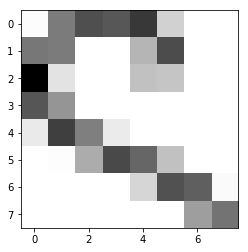

In [7]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

output = 'label'
features = list(data.columns)
features.remove(output)

image_with_label = data.iloc[65]

label = image_with_label[output]
image = image_with_label[features].values

image = image.reshape(8, 8)

print('The label is:', label)
plt.imshow(image[0:64], cmap='gray')

In [8]:
def random_split(data, features, output, fraction, seed=0):
    X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                        data[output],
                                                        stratify = data[output],
                                                        random_state=seed,
                                                        train_size=fraction
                                                       )
    train_data = pd.DataFrame(data=X_train, columns=features)
    train_data[output] = y_train
    test_data = pd.DataFrame(data=X_test, columns=features)
    test_data[output] = y_test
    
    return train_data, test_data

In [9]:
fraction = .75 # let train_data be 75% and test_data be 25%
seed = 0
output = 'label'
features = data.columns.tolist()
features.remove(output)
print('output:', output)
print('features:', features)

train_data, test_data = random_split(data, features, output, fraction, seed)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

output: label
features: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63']


/Users/faris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
print(len(train_data))
print(len(test_data))
print(len(train_data) / float(len(data)))
print(len(test_data) / float(len(data)))

45000
15000
0.75
0.25


In [11]:
binarizer = LabelBinarizer()
one_hot_encoded_train_labels = binarizer.fit_transform(train_data[output])

test_value = 21
print(train_data[output][test_value])
print(one_hot_encoded_train_labels[test_value])


5
[0 0 0 0 0 1 0 0 0 0]


# My First Implementation

In [12]:
X_train = train_data[features].values
y_train = one_hot_encoded_train_labels

X_test = test_data[features].values
y_test = binarizer.transform(test_data[output])

In [13]:
X = X_train.T
y = y_train.T

In [14]:
print(X.shape)
print(y.shape)

(64, 45000)
(10, 45000)


In [15]:
def sigmoid(Z):
    return 1. / (1 + np.exp(-Z))

def sigmoid_prime(A):
    return A * (1 - A)

In [16]:
X, y = train_data[features].values, one_hot_encoded_train_labels

In [17]:
X = X.T
y = y.T

In [18]:
print(X.shape)
print(y.shape)

(64, 45000)
(10, 45000)


# My Neural Network Implementation (Stochastic Gradient Descent)

## Put ALL Snippets Together

In [19]:
W1 = 2*np.random.random((32, 64)) - 1
W1 /= 32

b1 = 2*np.random.random((32, 1)) - 1

W2 = 2*np.random.random((16, 32)) - 1
W2 /= 16

b2 = 2*np.random.random((16, 1)) - 1

W3 = 2*np.random.random((10, 16)) - 1
W3 /= 10

b3 = 2*np.random.random((10, 1)) - 1

print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(32, 64) (32, 1)
(16, 32) (16, 1)
(10, 16) (10, 1)


In [18]:
alpha = 0.1

In [19]:
costs = []

In [20]:

for epoch in range(1000):
    total_cost = 0
    for i in range(X.shape[1]):
        
        m = 1
        start = i
        end = i + 1

        y_true = y[:, i]
        A0 = X[:, i]
        A0 = A0.reshape(A0.shape[0], 1)
        y_true = y_true.reshape(y_true.shape[0], 1)
        
        # feedforward
        Z1 = W1.dot(A0) + b1
        A1 = sigmoid(Z1)

        Z2 = W2.dot(A1) + b2
        A2 = sigmoid(Z2)

        Z3 = W3.dot(A2) + b3
        A3 = sigmoid(Z3)

        y_pred = A3

        y_true = np.atleast_2d(y_true)
        cost = 0.5 * np.sum((y_true - y_pred) ** 2)
        total_cost += cost

        # backpropagate error
        delta3 = (y_pred - y_true) * sigmoid_prime(y_pred)
        delta2 = W3.T.dot(delta3) * sigmoid_prime(A2)
        delta1 = W2.T.dot(delta2) * sigmoid_prime(A1)

        dW1 = delta1.dot(A0.T) / m
        dW2 = delta2.dot(A1.T) / m
        dW3 = delta3.dot(A2.T) / m

        db1 = delta1.sum(axis=1, keepdims=True) / m
        db2 = delta2.sum(axis=1, keepdims=True) / m
        db3 = delta3.sum(axis=1, keepdims=True) / m


        assert W1.shape == dW1.shape, 'Size Mismatch'
        assert W2.shape == dW2.shape, 'Size Mismatch'
        assert W3.shape == dW3.shape, 'Size Mismatch'
        assert b1.shape == db1.shape, 'Size Mismatch'
        assert b2.shape == db2.shape, 'Size Mismatch'
        assert b3.shape == db3.shape, 'Size Mismatch'

        W1_old = W1
        W2_old = W2
        W3_old = W3
        b1_old = b1
        b2_old = b2
        b3_old = b3


        # update weights
        W1 = W1 - alpha*dW1
        W2 = W2 - alpha*dW2
        W3 = W3 - alpha*dW3

        b1 = b1 - alpha*db1
        b2 = b2 - alpha*db2
        b3 = b3 - alpha*db3

        assert W1_old.shape == W1.shape, 'Size Mismatch'
        assert W2_old.shape == W2.shape, 'Size Mismatch'
        assert W3_old.shape == W3.shape, 'Size Mismatch'

        assert b1_old.shape == b1.shape, 'Size Mismatch'
        assert b2_old.shape == b2.shape, 'Size Mismatch'
        assert b3_old.shape == b3.shape, 'Size Mismatch'
    
    if epoch % 10 == 0:
        print(epoch, total_cost / 45000)
        costs.append(total_cost / 45000)


0 0.4377267952409696
10 0.022298888441646743
20 0.018007225942731145
30 0.015871026579998664
40 0.014402290584911125
50 0.013182635165868805
60 0.012424505063475623
70 0.01177335563999756
80 0.011572705825665839
90 0.011067116866013433
100 0.010525741345045277
110 0.010348455605899018
120 0.009908345796762722


KeyboardInterrupt: 

In [67]:
import time

In [68]:
W1 = 2*np.random.random((32, 64)) - 1
W1 /= 32

b1 = 2*np.random.random((32, 1)) - 1

W2 = 2*np.random.random((16, 32)) - 1
W2 /= 16

b2 = 2*np.random.random((16, 1)) - 1

W3 = 2*np.random.random((10, 16)) - 1
W3 /= 10

b3 = 2*np.random.random((10, 1)) - 1

print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)


(32, 64) (32, 1)
(16, 32) (16, 1)
(10, 16) (10, 1)


In [69]:
parameters = {}
parameters['W1'] = W1
parameters['b1'] = b1
parameters['W2'] = W2
parameters['b2'] = b2
parameters['W3'] = W3
parameters['b3'] = b3

parameters['num_of_layers'] = 3 # 3 layers since we have to hidden layers and the output layer

In [70]:
def feedforward(X, parameters):
    cache = {}
    cache['A0'] = X
    
    for i in range(1, parameters['num_of_layers'] + 1):
        W = parameters[f'W{i}']
        b = parameters[f'b{i}']
        A_prev = cache[f'A{i - 1}']
        
        Z = W.dot(A_prev) + b
        A = sigmoid(Z)
        
        cache[f'A{i}'] = A
        
    y_pred = A
    
    return y_pred, cache

In [71]:
L = parameters['num_of_layers']
for i in range(1, L + 1):
    print(f'{i}')

1
2
3


In [72]:
def backpropagation(y_true, y_pred, cache, parameters):
    L = parameters['num_of_layers']
    m = y_true.shape[1]
    errors = {}
    
    errors[f'delta{L}'] = -(y_true - y_pred) * sigmoid_prime(y_pred)
    
    for i in range(L, 1, -1):
        W = parameters[f'W{i}']
        delta = errors[f'delta{i}']
        A_prev = cache[f'A{i - 1}']
        
        delta_prev = W.T.dot(delta) * sigmoid_prime(A_prev)
        errors[f'delta{i - 1}'] = delta_prev
    
    
    gradients = {}
    for i in range(1, L + 1):
        delta = errors[f'delta{i}']
        A_prev = cache[f'A{i - 1}']
        
        dW = delta.dot(A_prev.T) / m
        
        gradients[f'dW{i}'] = dW
    
    for i in range(1, L + 1):
        delta = errors[f'delta{i}']
        db = delta.sum(axis=1, keepdims=True) / m
        gradients[f'db{i}'] = db

    return gradients

In [73]:
for i in range(1, L + 1):
    print(f'{i}')

1
2
3


In [74]:
def update_parameters(parameters, gradients, alpha):
    
    for i in range(1, L + 1):
        W = parameters[f'W{i}']
        b = parameters[f'b{i}']
        dW = gradients[f'dW{i}']
        db = gradients[f'db{i}']
        
        W = W - alpha*dW
        b = b - alpha*db
    
        parameters[f'W{i}'] = W
        parameters[f'b{i}'] = b
    
    return parameters

# Batch Gradient Descent

In [75]:
m = X.shape[1]
alpha = 0.9
costs = []
tic = time.time()
for epoch in range(50000):
    
    ### Shuffling ###
    indices = np.arange(X.shape[1])
    np.random.shuffle(indices)

    X = X[:, indices]
    y = y[:, indices]
    
    #################
    
    y_true = y
    
    y_pred, cache = feedforward(X, parameters)

    y_true = np.atleast_2d(y_true)
    cost = 0.5 * np.sum((y_true - y_pred) ** 2) / m

    gradients = backpropagation(y_true, y_pred, cache, parameters)

    for i in range(1, parameters['num_of_layers'] + 1):
        assert parameters[f'W{i}'].shape == gradients[f'dW{i}'].shape, 'Size Mismatch'
        assert parameters[f'b{i}'].shape == gradients[f'db{i}'].shape, 'Size Mismatch'
    
    # update weights
    parameters = update_parameters(parameters=parameters, gradients=gradients, alpha=alpha)

    costs.append(cost)
    
    if epoch % 100 == 0:
        print(epoch, cost)
toc = time.time()

0 1.2773950018604505
100 0.44998217072092755
200 0.44997139906983274
300 0.4499604219714625
400 0.4499490839135547
500 0.44993723981028805
600 0.44992473048491244
700 0.449911376767649
800 0.4498969721767117
900 0.4498812736198113
1000 0.44986398936069594
1100 0.44984476322108136
1200 0.44982315360085745
1300 0.44979860535336136
1400 0.44977041178296445
1500 0.44973766294189765
1600 0.4496991748296788
1700 0.4496533917220927
1800 0.44959824994270087
1900 0.4495309841027056
2000 0.44944784156880396
2100 0.4493436366781974
2200 0.44921099866525116
2300 0.44903899577316897
2400 0.4488104451608254
2500 0.4484963782728703
2600 0.448044032386392
2700 0.4473487532659316
2800 0.4461810311459112
2900 0.44397484451537245
3000 0.43923076189562466
3100 0.4295226789711783
3200 0.4191150769103871
3300 0.41314106065414286
3400 0.40898218611469467
3500 0.4050936658615265
3600 0.40113106078195454
3700 0.39715044285209533
3800 0.39330147930324166
3900 0.38966468600445625
4000 0.3862356556046477
4100 0.3

31700 0.02264441850643757
31800 0.0226104381683424
31900 0.022576644133313676
32000 0.02254303427342119
32100 0.022509606497903248
32200 0.02247635875252637
32300 0.022443289018958937
32400 0.02241039531415778
32500 0.02237767568976687
32600 0.022345128231526807
32700 0.022312751058694326
32800 0.022280542323470612
32900 0.022248500210437675
33000 0.022216622936002007
33100 0.022184908747844224
33200 0.022153355924374514
33300 0.022121962774192778
33400 0.022090727635553052
33500 0.022059648875831468
33600 0.0220287248909975
33700 0.021997954105087866
33800 0.021967334969682763
33900 0.021936865963384317
34000 0.021906545591296712
34100 0.021876372384508222
34200 0.021846344899574682
34300 0.021816461718004637
34400 0.02178672144574598
34500 0.0217571227126743
34600 0.02172766417208299
34700 0.0216983445001753
34800 0.02166916239555852
34900 0.021640116578740636
35000 0.0216112057916297
35100 0.021582428797036275
35200 0.021553784378179272
35300 0.021525271338195776
35400 0.02149688849

In [76]:
(toc - tic) / 3600

1.9698187483019298

In [80]:
A0 = X_test.T
A0.shape

(64, 15000)

In [81]:
y_true = y_test.T
y_true.shape

(10, 15000)

In [82]:
y_pred, _ = feedforward(A0, parameters)

In [83]:
print(y_pred.shape)
print(y_true.shape)

(10, 15000)
(10, 15000)


In [84]:
len(costs)

50000

In [85]:
y_pred

array([[3.54674084e-02, 9.64876300e-01, 4.65645688e-06, ...,
        5.35647732e-06, 1.50573471e-06, 4.30081574e-04],
       [9.98270888e-04, 2.98824193e-03, 1.50365706e-03, ...,
        2.85931517e-03, 1.08044642e-02, 4.73972712e-05],
       [4.06311892e-07, 2.65219978e-07, 9.98589657e-01, ...,
        9.75858153e-01, 6.57909667e-03, 6.50065717e-03],
       ...,
       [2.12011209e-04, 4.43436761e-03, 2.26704947e-05, ...,
        1.35776643e-04, 3.75621724e-06, 7.73895560e-04],
       [9.97456876e-01, 1.29018163e-03, 1.51281044e-07, ...,
        3.26763908e-08, 9.69978458e-03, 3.99399264e-03],
       [6.44959252e-04, 1.36965204e-08, 1.86138399e-03, ...,
        1.37992803e-04, 2.99254299e-03, 4.06310347e-09]])

In [86]:
my_labels_pred = binarizer.inverse_transform(y_pred.T)
print(classification_report(test_data[output], my_labels_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1500
           1       0.93      0.94      0.94      1500
           2       0.99      0.99      0.99      1500
           3       0.99      0.98      0.99      1500
           4       0.98      0.99      0.99      1500
           5       0.99      0.98      0.98      1500
           6       0.98      0.99      0.99      1500
           7       0.99      0.99      0.99      1500
           8       0.99      0.98      0.98      1500
           9       0.98      0.98      0.98      1500

   micro avg       0.98      0.98      0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



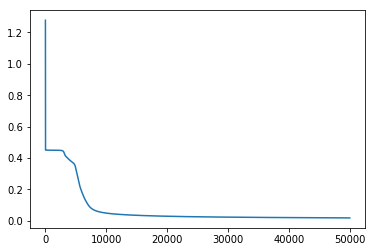

In [87]:
plt.plot(costs)

# Mini-Batch Gradient Descent

In [201]:
W1 = 2*np.random.random((32, 64)) - 1
W1 /= 32

b1 = 2*np.random.random((32, 1)) - 1

W2 = 2*np.random.random((16, 32)) - 1
W2 /= 16

b2 = 2*np.random.random((16, 1)) - 1

W3 = 2*np.random.random((10, 16)) - 1
W3 /= 10

b3 = 2*np.random.random((10, 1)) - 1

print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)


(32, 64) (32, 1)
(16, 32) (16, 1)
(10, 16) (10, 1)


In [202]:
parameters = {}
parameters['W1'] = W1
parameters['b1'] = b1
parameters['W2'] = W2
parameters['b2'] = b2
parameters['W3'] = W3
parameters['b3'] = b3

parameters['num_of_layers'] = 3 # 3 layers since we have to hidden layers and the output layer

In [203]:
def get_mini_batches(X, y, batch_size):
    assert X.shape[1] == y.shape[1], 'Size Mismatch'
    m = X.shape[1]
    num_of_mini_batches = m // batch_size

    for i in range(num_of_mini_batches):
        start = i * batch_size
        end = start + batch_size
        mini_bacth_X = X[:, start:end]
        mini_batch_y = y[:, start:end]
        yield mini_bacth_X, mini_batch_y

    if m % batch_size != 0:
        last_mini_bacth_X = X[:, end:]
        last_mini_bacth_y = y[:, end:]
        yield last_mini_bacth_X, last_mini_bacth_y

In [204]:
batch_size = 128
print(batch_size)

128


In [205]:
m = X.shape[1]
alpha = 1
costs = []
tic = time.time()

for epoch in range(5000):
    
    ### Shuffling ###
    indices = np.arange(X.shape[1])
    np.random.shuffle(indices)
    X = X[:, indices]
    y = y[:, indices]
    #################
    total_cost = 0
    j = 0
    for mini_bacth_X, mini_bacth_y in get_mini_batches(X, y, batch_size):
        
        y_true = mini_bacth_y

        y_pred, cache = feedforward(mini_bacth_X, parameters)

        y_true = np.atleast_2d(y_true)
        cost = 0.5 * np.sum((y_true - y_pred) ** 2) / m
        total_cost += cost
        
        gradients = backpropagation(y_true, y_pred, cache, parameters)

        for i in range(1, parameters['num_of_layers'] + 1):
            assert parameters[f'W{i}'].shape == gradients[f'dW{i}'].shape, 'Size Mismatch'
            assert parameters[f'b{i}'].shape == gradients[f'db{i}'].shape, 'Size Mismatch'

        # update weights
        parameters = update_parameters(parameters=parameters, gradients=gradients, alpha=alpha)
        j += 1
    
    avg_cost = total_cost / j
    costs.append(avg_cost)
    if epoch % 10 == 0:
        print(epoch, avg_cost)

toc = time.time()

0 0.0012938026110962586
10 0.0010856389008924126
20 0.0001885177635576208
30 0.00011979551005297127
40 9.625371359433648e-05
50 8.437915733362534e-05
60 7.68300785254759e-05
70 7.128842688585163e-05
80 6.67824501115348e-05
90 6.35174453577128e-05
100 6.069655812104624e-05
110 5.806869097491302e-05
120 5.600392585905865e-05
130 5.430316443595128e-05
140 5.2689343467474504e-05
150 5.1069556322421725e-05
160 4.9766937846419445e-05
170 4.8661358566293756e-05
180 4.757259480012482e-05
190 4.6524943578751683e-05
200 4.551853936722294e-05
210 4.479541851057042e-05
220 4.384372921315022e-05
230 4.305373543524402e-05
240 4.225478465235355e-05
250 4.1739939606142405e-05
260 4.1002768530756726e-05
270 4.04600172806477e-05
280 3.990900923031224e-05
290 3.928479122386993e-05
300 3.8878826574865834e-05
310 3.829850846690004e-05
320 3.780260584635125e-05
330 3.7205495839443465e-05
340 3.684820837968805e-05
350 3.646388816909495e-05
360 3.604889173632973e-05
370 3.573509394476499e-05
380 3.51846712660

3010 1.2966358059732359e-05
3020 1.2897874174192144e-05
3030 1.290617222941356e-05
3040 1.287303996835782e-05
3050 1.2891173073868724e-05
3060 1.2884961410421972e-05
3070 1.284687646639336e-05
3080 1.2856029437052388e-05
3090 1.2838965240217745e-05
3100 1.2835312398538472e-05
3110 1.2846812483270843e-05
3120 1.2820512730859407e-05
3130 1.2853500146874207e-05
3140 1.2795927163000174e-05
3150 1.2870102452758834e-05
3160 1.279504598804762e-05
3170 1.2782726062674627e-05
3180 1.2787596245317867e-05
3190 1.2767879165626862e-05
3200 1.2775444496307272e-05
3210 1.2760286254003406e-05
3220 1.2722422165133336e-05
3230 1.270666195629937e-05
3240 1.270786810208759e-05
3250 1.2684599303449024e-05
3260 1.2675249786205425e-05
3270 1.2665596299543166e-05
3280 1.2660780108210596e-05
3290 1.2651775705050282e-05
3300 1.262630634227352e-05
3310 1.2605089533794196e-05
3320 1.258983161204678e-05
3330 1.2595751802638951e-05
3340 1.2614461823114982e-05
3350 1.2585028853445594e-05
3360 1.2571501312858262e-05


In [206]:
(toc - tic) / 60

14.81169508298238

In [207]:
A0 = X_test.T
A0.shape

(64, 15000)

In [208]:
y_true = y_test.T
y_true.shape

(10, 15000)

In [209]:
y_pred, _ = feedforward(A0, parameters)

In [210]:
print(y_pred.shape)
print(y_true.shape)

(10, 15000)
(10, 15000)


In [211]:
len(costs)

5000

In [212]:
y_pred

array([[1.19980187e-04, 9.99998285e-01, 1.83519474e-15, ...,
        2.14607051e-12, 5.85830317e-15, 5.07646919e-06],
       [7.71506038e-09, 3.22886812e-05, 5.27891450e-09, ...,
        3.31756678e-05, 1.58700942e-06, 4.38378065e-14],
       [4.86348071e-13, 7.35260760e-12, 9.99999384e-01, ...,
        9.99992418e-01, 4.66459410e-05, 3.16618901e-09],
       ...,
       [9.26181968e-12, 2.29008584e-03, 3.47502009e-09, ...,
        4.35871572e-08, 6.54719797e-10, 1.06914575e-11],
       [9.99639402e-01, 2.66728296e-07, 5.14522534e-08, ...,
        1.40254191e-11, 6.08678560e-10, 6.23581714e-05],
       [6.07979127e-06, 1.25677637e-09, 1.79907282e-06, ...,
        9.98229458e-09, 4.75568356e-06, 1.77643577e-15]])

In [213]:
my_labels_pred = binarizer.inverse_transform(y_pred.T)
print(classification_report(test_data[output], my_labels_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1500
           1       0.93      0.93      0.93      1500
           2       0.99      0.99      0.99      1500
           3       0.99      0.99      0.99      1500
           4       0.99      0.99      0.99      1500
           5       0.99      0.98      0.98      1500
           6       0.98      0.99      0.98      1500
           7       0.99      0.99      0.99      1500
           8       0.99      0.99      0.99      1500
           9       0.98      0.98      0.98      1500

   micro avg       0.97      0.97      0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



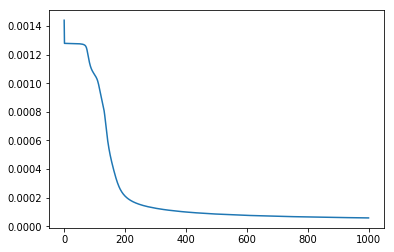

In [180]:
plt.plot(costs)